<font size=4>

    
En cada ejercicio pueden agregar el número de celdas que requieran, por defecto se da solo una. 
    
 ___

<font size=4>
    
  Se descargó la base de datos *Superconductivty Data Data Set*.

    
[UCI Machine Learning Repository: Superconductivty Data Data Set ](https://archive.ics.uci.edu/ml/datasets/Superconductivty+Data)



Hay dos archivos: 

    (1) train.csv: contiene 81 características extraídas de 21263 superconductores junto con la temperatura crítica en la columna 82, 


    (2) unique_m.csv: contiene la fórmula química dividida para todos los 21263 superconductores del archivo  train.csv 



Las dos últimas columnas tienen la temperatura crítica y la fórmula química. Los datos originales provienen de [aquí](https://supercon.nims.go.jp/index_en.html) que es público. 

**El objetivo aquí es predecir la temperatura crítica en función de las características extraídas.**

<font size=4 color='rosybrown'>

    
# Parte 1: Análisis de datos

<font size=4 color='cornflowerblue'>

    
## Ejercicio 1

<font size=4>
    
 Importa las librerias que vas a usar:
    
  - pandas
  
  - matplotlib.pyplot
    
  - numpy

In [1]:
# ejercicio 1
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

<font size=4 color='cornflowerblue'>
    
## Ejercicio 2

<font size=4>
    
1. Haz un dataframe con el archivo 'train.csv', usando la función read_csv() de pandas.
    
    
2. Visualiza el dataframe (puedes usar los atributos head() y tail()).
    
    
3. Usa el método describe() para obtener los datos estadísticos de todo el dataframe.

In [2]:
# dataframe a partir de train.csv
df = pd.read_csv('data/train.csv')

In [3]:
# visualizacion 10 primeros
df.head(10)

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.0
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.0
5,4,88.944468,57.795044,66.361592,36.098926,1.181795,1.225203,122.90607,20.687458,51.968828,...,2.214286,2.213364,2.181543,1.368922,1.141474,1,1.000000,0.433013,0.410326,23.0
6,4,88.944468,57.682296,66.361592,36.069470,1.181795,1.316857,122.90607,10.765639,51.968828,...,2.142857,2.213364,2.119268,1.368922,1.194453,1,0.857143,0.433013,0.349927,11.0
7,4,76.517718,57.175142,59.310096,35.891368,1.197273,0.943560,122.90607,36.451199,44.289459,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,33.0
8,4,76.517718,56.808817,59.310096,35.773432,1.197273,0.981880,122.90607,34.833160,44.289459,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,36.0
9,4,76.517718,56.442492,59.310096,35.655884,1.197273,1.016495,122.90607,33.215121,44.289459,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,31.0


In [4]:
# visualizacion 10 ultimos
df.tail(10)

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
21253,4,99.290200,85.845160,62.256121,54.519504,1.037993,1.122529,192.98100,38.596200,79.302066,...,4.600000,3.935979,4.282255,1.319730,1.187775,4,2.000000,1.479020,1.496663,1.60
21254,4,99.290200,85.845160,62.256121,54.519504,1.037993,1.122529,192.98100,38.596200,79.302066,...,4.600000,3.935979,4.282255,1.319730,1.187775,4,2.000000,1.479020,1.496663,3.00
21255,3,89.389833,89.389833,63.694713,63.694713,0.782574,0.782574,164.13150,54.710500,73.156893,...,4.666667,4.578857,4.578857,1.078992,1.078992,2,0.666667,0.942809,0.942809,1.42
21256,3,89.389833,89.389833,63.694713,63.694713,0.782574,0.782574,164.13150,54.710500,73.156893,...,4.666667,4.578857,4.578857,1.078992,1.078992,2,0.666667,0.942809,0.942809,1.85
21257,3,89.389833,89.389833,63.694713,63.694713,0.782574,0.782574,164.13150,54.710500,73.156893,...,4.666667,4.578857,4.578857,1.078992,1.078992,2,0.666667,0.942809,0.942809,3.43
21258,4,106.957877,53.095769,82.515384,43.135565,1.177145,1.254119,146.88130,15.504479,65.764081,...,3.555556,3.223710,3.519911,1.377820,0.913658,1,2.168889,0.433013,0.496904,2.44
21259,5,92.266740,49.021367,64.812662,32.867748,1.323287,1.571630,188.38390,7.353333,69.232655,...,2.047619,2.168944,2.038991,1.594167,1.337246,1,0.904762,0.400000,0.212959,122.10
21260,2,99.663190,95.609104,99.433882,95.464320,0.690847,0.530198,13.51362,53.041104,6.756810,...,4.800000,4.472136,4.781762,0.686962,0.450561,1,3.200000,0.500000,0.400000,1.98
21261,2,99.663190,97.095602,99.433882,96.901083,0.690847,0.640883,13.51362,31.115202,6.756810,...,4.690000,4.472136,4.665819,0.686962,0.577601,1,2.210000,0.500000,0.462493,1.84
21262,3,87.468333,86.858500,82.555758,80.458722,1.041270,0.895229,71.75500,43.144000,29.905282,...,4.500000,4.762203,4.242641,1.054920,0.970116,3,1.800000,1.414214,1.500000,12.80


In [5]:
# Resumen de datos estadisticos

df.describe()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
count,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,...,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000
mean,4.115224,87.557631,72.988310,71.290627,58.539916,1.165608,1.063884,115.601251,33.225218,44.391893,...,3.153127,3.056536,3.055885,1.295682,1.052841,2.041010,1.483007,0.839342,0.673987,34.421219
std,1.439295,29.676497,33.490406,31.030272,36.651067,0.364930,0.401423,54.626887,26.967752,20.035430,...,1.191249,1.046257,1.174815,0.393155,0.380291,1.242345,0.978176,0.484676,0.455580,34.254362
min,1.000000,6.941000,6.423452,5.320573,1.960849,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000210
25%,3.000000,72.458076,52.143839,58.041225,35.248990,0.966676,0.775363,78.512902,16.824174,32.890369,...,2.116732,2.279705,2.091251,1.060857,0.775678,1.000000,0.921454,0.451754,0.306892,5.365000
50%,4.000000,84.922750,60.696571,66.361592,39.918385,1.199541,1.146783,122.906070,26.636008,45.123500,...,2.618182,2.615321,2.434057,1.368922,1.166532,2.000000,1.063077,0.800000,0.500000,20.000000
75%,5.000000,100.404410,86.103540,78.116681,73.113234,1.444537,1.359418,154.119320,38.356908,59.322812,...,4.026201,3.727919,3.914868,1.589027,1.330801,3.000000,1.918400,1.200000,1.020436,63.000000
max,9.000000,208.980400,208.980400,208.980400,208.980400,1.983797,1.958203,207.972460,205.589910,101.019700,...,7.000000,7.000000,7.000000,2.141963,1.949739,6.000000,6.992200,3.000000,3.000000,185.000000


[read_csv( )](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)

<font size=4 color='cornflowerblue'>
    
## Ejercicio 3

<font size=4>
    
 Responde las siguientes preguntas:
    
¿Cuántas muestras tienes?,¿Qué define a cada muestra? 
    
    
¿Cuáles son los rasgos (variables independientes)?, ¿a qué columnas corresponden?
    
    
¿Cuál(es) es la variable de salida (variable dependiente)?, ¿a qué columnas corresponden?
    
 Nota: el atributo shape te podría ser útil, además de la información que se da al inicio sobre el conjunto de datos.
    

In [6]:
# ¿Cuántas muestras tienes?,¿Qué define a cada muestra?
n_samples, n_features = df.shape
print(f'El dataframe contiene {n_samples} muestras. Cada muestra presenta {n_features} caracteristicas que la definen. Por ejemplo: ', end='')
for i in range(0, len(df.columns), 5):
    print(f'{df.columns[i]}, ', end='')
print(f'{df.columns[-1]}.')

El dataframe contiene 21263 muestras. Cada muestra presenta 82 caracteristicas que la definen. Por ejemplo: number_of_elements, entropy_atomic_mass, wtd_std_atomic_mass, entropy_fie, wtd_std_fie, entropy_atomic_radius, wtd_std_atomic_radius, entropy_Density, wtd_std_Density, entropy_ElectronAffinity, wtd_std_ElectronAffinity, entropy_FusionHeat, wtd_std_FusionHeat, entropy_ThermalConductivity, wtd_std_ThermalConductivity, entropy_Valence, wtd_std_Valence, critical_temp.


In [7]:
# ¿Cuáles son los rasgos (variables independientes)?, ¿a qué columnas corresponden? (0-count)
print(f'De las {n_features} caracteristicas, se toman {n_features - 1} como independientes. Estas van desde la columna 0 hasta la 80 (se omite la ultima).')

De las 82 caracteristicas, se toman 81 como independientes. Estas van desde la columna 0 hasta la 80 (se omite la ultima).


In [8]:
# ¿Cuál(es) es la variable de salida (variable dependiente)?, ¿a qué columnas corresponden?
print(f'La ultima caracteristica (temperatura critica) se toma como variable dependiente. Se ubica en la ultima columna (indice 81).')

La ultima caracteristica (temperatura critica) se toma como variable dependiente. Se ubica en la ultima columna (indice 81).


<font size=4 color='cornflowerblue'>
    
## Ejercicio 4

<font size=4>
    
Grafica los histogramas para al menos 4 de las columnas del dataframe creado. 

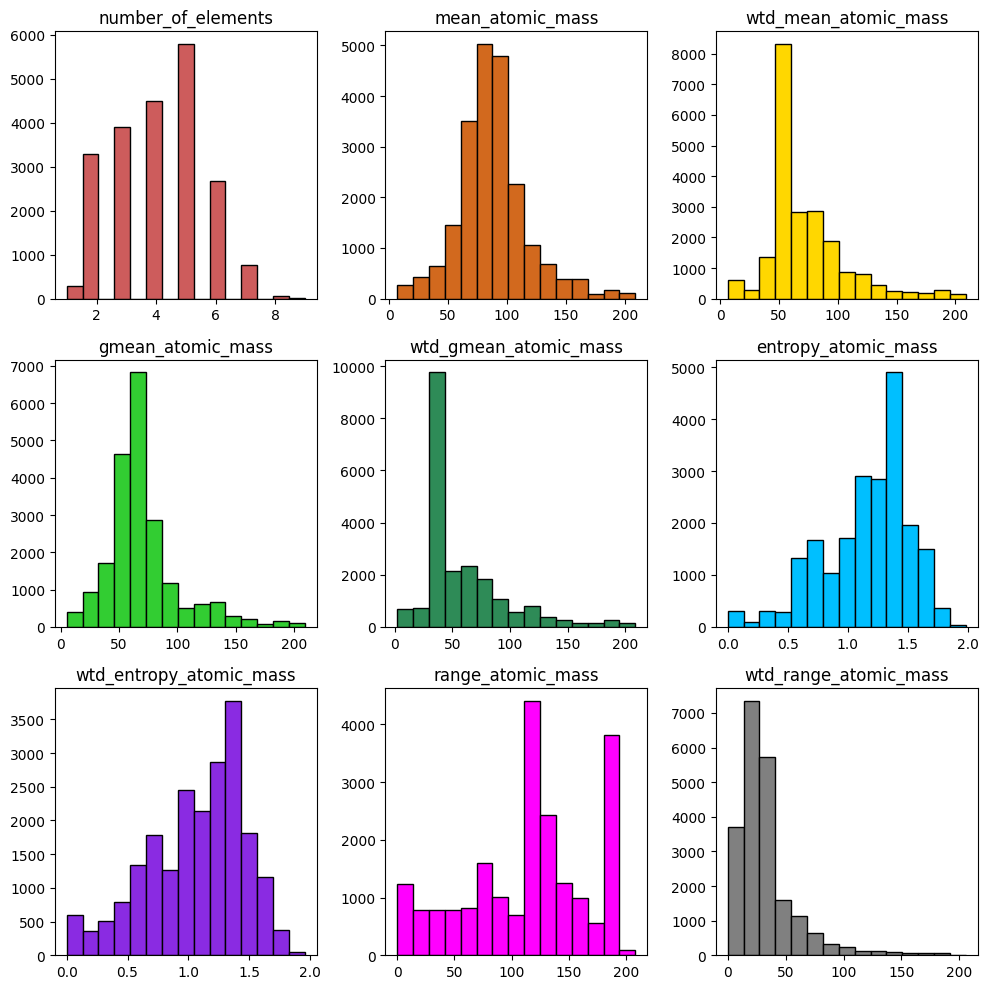

In [9]:
# lista completa de nombres de variables independientes
features = list(df.columns)

# tomamos las primeras 9 variables
_features = features[:9]
colors = ['indianred', 'chocolate', 'gold', 'limegreen', 'seagreen', 'deepskyblue', 'blueviolet', 'fuchsia', 'gray']

# graficamos los histogramas
fig, axs = plt.subplots(3, 3, figsize=(10,10))
for i, (feature, ax) in enumerate(zip(_features, fig.axes)):
    ax.hist(df[feature], bins=15, color=colors[i], ec='black')
    ax.set_title(feature)
plt.tight_layout()
plt.show()

<font size=4 color='cornflowerblue'>
    
## Ejercicio 5

<font size=4>
    
1. Intercambia el orden de los renglones del dataframe.
    
    
2. Divide en dos el dataframe, el primero que contenga el 90% de las muestras (nombralo df_train) y el otro que contenga el resto de las muestras (nombralo df_test).
    
    
3. Muestra en pantalla las dimensiones resultantes de cada dataframe.

In [10]:
# usamos pandas.DataFrame.sample(frac=1) que reordena aleatoriamente las filas del dataframe segun la documentacion de pandas
df = df.sample(frac=1, random_state=3)
df

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
6988,4,90.975850,59.344100,67.327555,36.496948,1.176393,1.010635,128.24260,35.118614,53.911738,...,2.307143,2.632148,2.259535,1.342113,1.096043,2,1.057143,0.829156,0.505632,18.20
2147,5,96.113560,92.153650,66.433762,65.853421,1.314167,1.213375,192.98100,50.245175,72.769642,...,2.812500,2.605171,2.579412,1.531778,1.397395,3,1.062500,1.166190,1.285435,31.50
16990,5,85.189810,58.074799,66.621104,36.001388,1.426455,1.030153,124.90825,36.804721,48.517131,...,2.566171,2.639016,2.433589,1.549826,1.087548,2,1.147912,0.979796,0.900995,18.41
183,4,95.450680,92.317389,69.272696,74.526638,1.161763,1.163895,148.93092,36.950657,58.973428,...,2.142857,2.213364,2.119268,1.368922,1.309526,1,0.571429,0.433013,0.349927,90.00
12784,2,142.561690,129.651309,133.634523,121.582664,0.631198,0.688425,99.31062,12.589271,49.655310,...,5.370000,5.477226,5.348932,0.689009,0.678075,1,0.930000,0.500000,0.482804,2.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6400,5,82.325340,51.217908,59.241947,33.937118,1.318401,1.502991,188.38390,12.836352,65.517648,...,2.078125,2.168944,2.064368,1.594167,1.353489,1,0.906250,0.400000,0.268368,68.00
15288,2,69.545500,82.552600,66.080400,80.185258,0.643744,0.358812,43.35700,63.405800,21.678500,...,4.000000,4.000000,4.000000,0.693147,0.500402,0,2.400000,0.000000,0.000000,1.01
11513,4,133.853695,102.596475,127.544605,100.768261,1.335290,0.915682,116.07402,65.374110,44.475818,...,4.750000,4.161791,4.717277,1.366425,0.685039,2,3.637500,0.829156,0.512348,18.01
1688,7,106.454829,90.433970,78.774541,69.366040,1.709748,1.655979,192.98100,32.263688,71.393594,...,2.678959,2.869006,2.469688,1.855373,1.804471,3,0.639913,1.355262,1.220296,116.50


In [11]:
# Division
ratio = 0.9
n_train = int(ratio*n_samples)  # numero de muestras para entrenamiento
df_train = df.iloc[:n_train,:]
df_test = df.iloc[n_train:,:]

In [12]:
n_train_samples, _ = df_train.shape
print(f'Dimensiones de df_train: {df_train.shape}. Corresponde al {n_train_samples/n_samples*100: .2f}% de las muestras totales.')
n_test_samples, _ = df_test.shape
print(f'Dimensiones de df_test: {df_test.shape}. Corresponde al {n_test_samples/n_samples*100: .2f}% de las muestras totales.')

Dimensiones de df_train: (19136, 82). Corresponde al  90.00% de las muestras totales.
Dimensiones de df_test: (2127, 82). Corresponde al  10.00% de las muestras totales.


<font size=4 color='cornflowerblue'>
    
## Ejercicio 6

<font size=4>

Normaliza las muestras de los dataframe df_train y df_test usando los datos estadísticos del dataframe correspondiente a las muestras de entrenamiento. 

$$x_{norm} = \dfrac{x-\bar{x}}{\sigma}$$

In [13]:
# ejercicio 6
def normalization(df, features, mean, std):
    '''
    Normalizacion de las muestras.
    Input
        df (DataFrame)  : dataframe de los datos empleados
        features (list) : lista de variables o caracteristicas donde se realiza la normalizacion
    Output
        Dataframe normalizado
    '''

    _df = df.copy()
    for feature in features:
        _mean = mean[feature]
        _std = std[feature]
        _df.loc[:,feature] = (df[feature] - _mean)/_std
    return _df

In [14]:
mean = df_train.mean()
std = df_train.std()
# features incluye todas las (81) variables independientes
df_train = normalization(df_train, features, mean, std)
df_test = normalization(df_test, features, mean, std)

<font size=4 color='cornflowerblue'>
    
## Ejercicio 7

<font size=4>

1. Crea los arreglos train_x y train_y con los valores de las columnas correspondientes a las variables independientes y a las variables dependientes del dataframe train, respectivamente. 
    
    
2. Crea los arreglos test_x y test_y con los valores de las columnas correspondientes a las variables independientes y a las variables dependientes del dataframe test, respectivamente. 
    
    
3. Muestra en pantalla las dimensiones de cada arreglo.

In [15]:
# Ejercicio 7
train_x, train_y = df_train.iloc[:,:-1], df_train.iloc[:,-1]
test_x, test_y = df_test.iloc[:,:-1], df_test.iloc[:,-1]

In [16]:
print(f'Dimensiones de train_x: {train_x.shape}')
print(f'Dimensiones de train_y: {train_y.shape}')
print(f'Dimensiones de test_x: {test_x.shape}')
print(f'Dimensiones de test_x: {test_y.shape}')

Dimensiones de train_x: (19136, 81)
Dimensiones de train_y: (19136,)
Dimensiones de test_x: (2127, 81)
Dimensiones de test_x: (2127,)
